# Humanli.AI Assessment

## Task-1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import warnings
warnings.filterwarnings('ignore')

In [2]:
imdb_dataset=pd.read_excel('~/Downloads/Humanli Dataset.xlsx',)
imdb_dataset

,Feedback,Target
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


# Task-2. Exploratory Data Analysis

## Check the data type

In [3]:
imdb_dataset.dtypes

Feedback    object
Target       int64
dtype: object

## Missing Value Analysis

In [4]:
imdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Feedback  748 non-null    object
 1   Target    748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [5]:
# Checking Missing Values
imdb_dataset.isna().sum()

Feedback    0
Target      0
dtype: int64

In [6]:
imdb_dataset.isna()

,Feedback,Target
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
743,False,False
744,False,False
745,False,False
746,False,False


In [7]:
imdb_dataset.shape

(748, 2)

## Analysis of Duplicate Values

In [8]:
imdb_dataset.duplicated('Feedback')

0      False
1      False
2      False
3      False
4      False
       ...  
743    False
744    False
745    False
746    False
747    False
Length: 748, dtype: bool

In [9]:
imdb_dataset.duplicated('Feedback').any()

True

In [10]:
imdb_dataset=imdb_dataset.drop_duplicates()

In [11]:
imdb_dataset

,Feedback,Target
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


## Counting of Sentiments

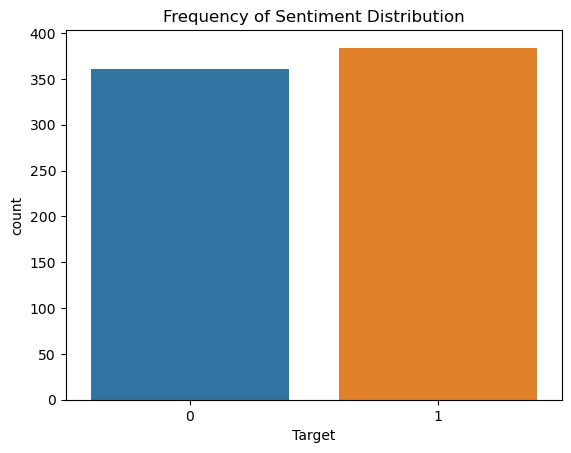

In [12]:
sns.countplot(x='Target',data=imdb_dataset)
plt.title('Frequency of Sentiment Distribution')
plt.show()

# Task-3. Data Pre-processing

## Tokenization using Word Tokenization

In [13]:
import string
from string import punctuation

## Punctuations

In [14]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Stop Words

In [15]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Removing Stop Words, Punctuations and other noise

In [16]:
def data_processing(text):
    letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text))     # Column and row to search    
    text= letters_only.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text) #usoing word tokenization
    filtered_text = [w for w in text_tokens if not w in stop_words and w not in punctuation]
    return " ".join(filtered_text)

In [17]:
imdb_dataset.Feedback = imdb_dataset['Feedback'].apply(data_processing)

In [18]:
imdb_dataset

,Feedback,Target
0,slow moving aimless movie distressed drifting ...,0
1,sure lost flat characters audience nearly half...,0
2,attempting artiness black white clever camera ...,0
3,little music anything speak,0
4,best scene movie gerardo trying find song keep...,1
...,...,...
743,got bored watching jessice lange take clothes,0
744,unfortunately virtue film production work lost...,0
745,word embarrassing,0
746,exceptionally bad,0


## Word Count

In [19]:
def no_of_words(text):
    words=text.split()
    word_count=len(words)
    return word_count

In [20]:
imdb_dataset['Word Count']=imdb_dataset['Feedback'].apply(no_of_words)

In [21]:
imdb_dataset

,Feedback,Target,Word Count
0,slow moving aimless movie distressed drifting ...,0,8
1,sure lost flat characters audience nearly half...,0,8
2,attempting artiness black white clever camera ...,0,19
3,little music anything speak,0,4
4,best scene movie gerardo trying find song keep...,1,10
...,...,...,...
743,got bored watching jessice lange take clothes,0,7
744,unfortunately virtue film production work lost...,0,8
745,word embarrassing,0,2
746,exceptionally bad,0,2


# Task-4. Visualization

## Positive Feedback

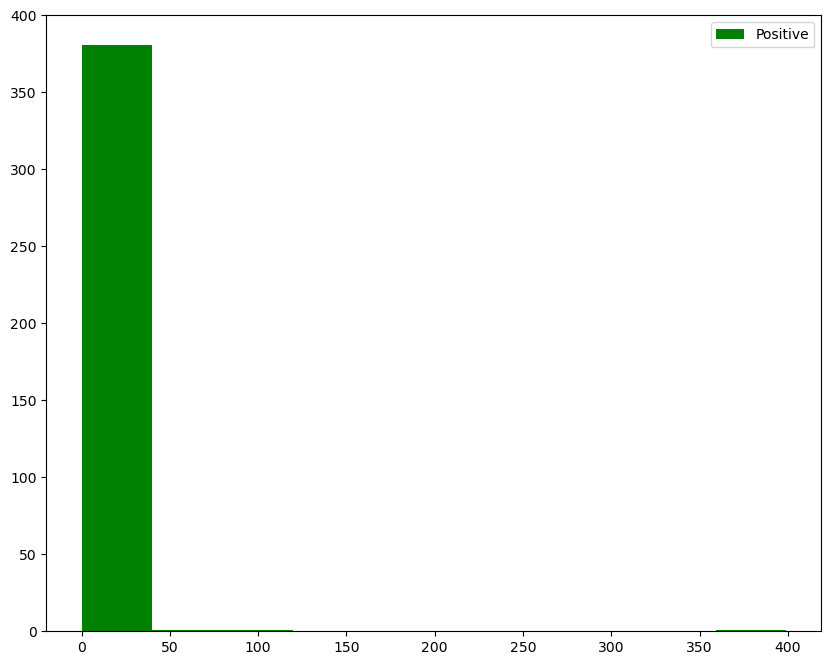

In [22]:
plt.figure(figsize=(10,8))
plt.hist(imdb_dataset[imdb_dataset['Target'] == 1]['Word Count'], label='Positive', color='green')
plt.legend(loc='upper right');
plt.show()

## Negative Feedback

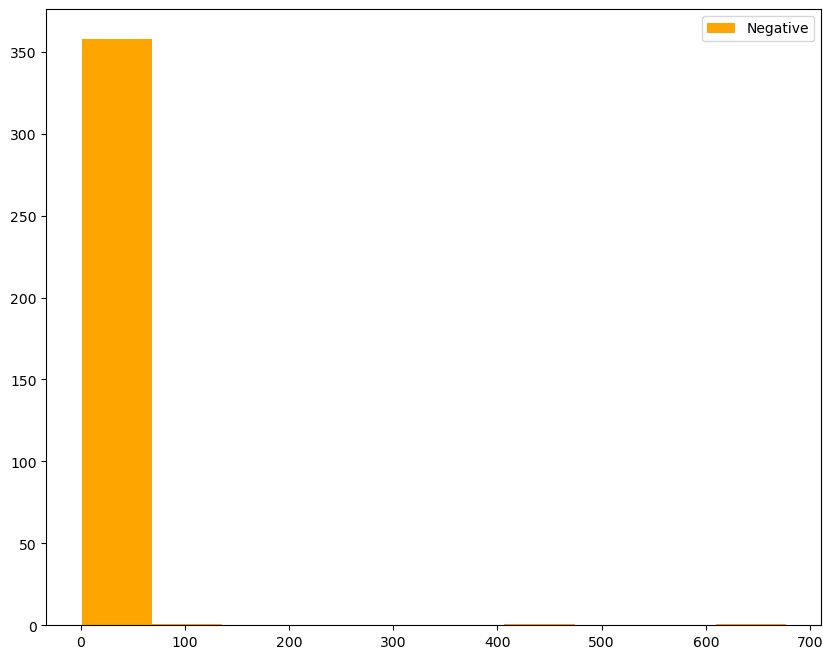

In [23]:
plt.figure(figsize=(10,8))
plt.hist(imdb_dataset[imdb_dataset['Target'] == 0]['Word Count'], label='Negative', color='orange')
plt.legend(loc='upper right');
plt.show()

## Stemming

In [24]:
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

In [25]:
#import nltk
#nltk.download('wordnet')

In [26]:
#import nltk
#nltk.download('omw-1.4')

In [27]:
stemmer = SnowballStemmer('english')
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [28]:
imdb_dataset.Feedback = imdb_dataset['Feedback'].apply(lambda x: stemming(x))

In [29]:
imdb_dataset['Word Count'] = imdb_dataset['Feedback'].apply(no_of_words)
imdb_dataset.head()

,Feedback,Target,Word Count
0,slow moving aimless movie distressed drifting ...,0,8
1,sure lost flat characters audience nearly half...,0,8
2,attempting artiness black white clever camera ...,0,19
3,little music anything speak,0,4
4,best scene movie gerardo trying find song keep...,1,10


In [30]:
pos_reviews =  imdb_dataset[imdb_dataset.Target == 1]
pos_reviews.head()

,Feedback,Target,Word Count
4,best scene movie gerardo trying find song keep...,1,10
7,saw movie today thought good effort good messa...,1,9
9,loved casting jimmy buffet science teacher,1,6
10,baby owls adorable,1,3
11,movie showed lot florida best made look appealing,1,8


In [31]:
#!python -m pip install wordcloud

In [32]:
import wordcloud
from wordcloud import WordCloud

## Word Cloud Visualization for Positive Reviews

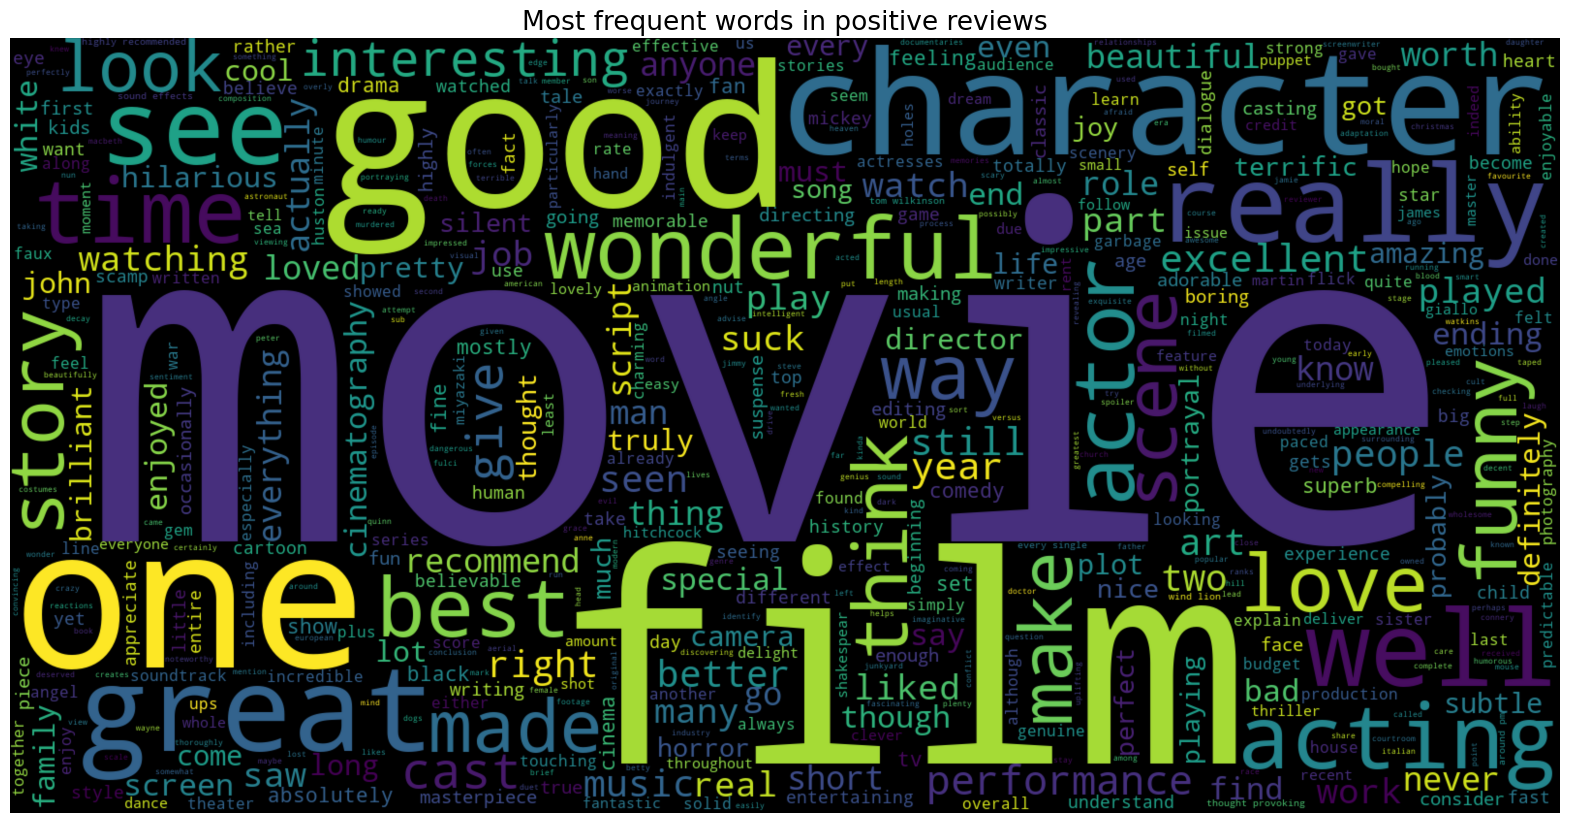

In [33]:
text = ' '.join([word for word in pos_reviews['Feedback']])
plt.figure(figsize=(20,15))
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='gaussian')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [34]:
from collections import Counter
count = Counter()
for text in pos_reviews['Feedback'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 91),
 ('movie', 87),
 ('good', 36),
 ('one', 35),
 ('great', 29),
 ('really', 23),
 ('like', 23),
 ('well', 22),
 ('see', 22),
 ('acting', 19),
 ('characters', 18),
 ('time', 17),
 ('wonderful', 17),
 ('best', 16),
 ('movies', 16)]

In [35]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words

,word,count
0,film,91
1,movie,87
2,good,36
3,one,35
4,great,29
5,really,23
6,like,23
7,well,22
8,see,22
9,acting,19


In [36]:
neg_reviews =  imdb_dataset[imdb_dataset.Target == 0]
neg_reviews.head()

,Feedback,Target,Word Count
0,slow moving aimless movie distressed drifting ...,0,8
1,sure lost flat characters audience nearly half...,0,8
2,attempting artiness black white clever camera ...,0,19
3,little music anything speak,0,4
5,rest movie lacks art charm meaning emptiness w...,0,10


## Word Cloud Visualization for Negative Reviews

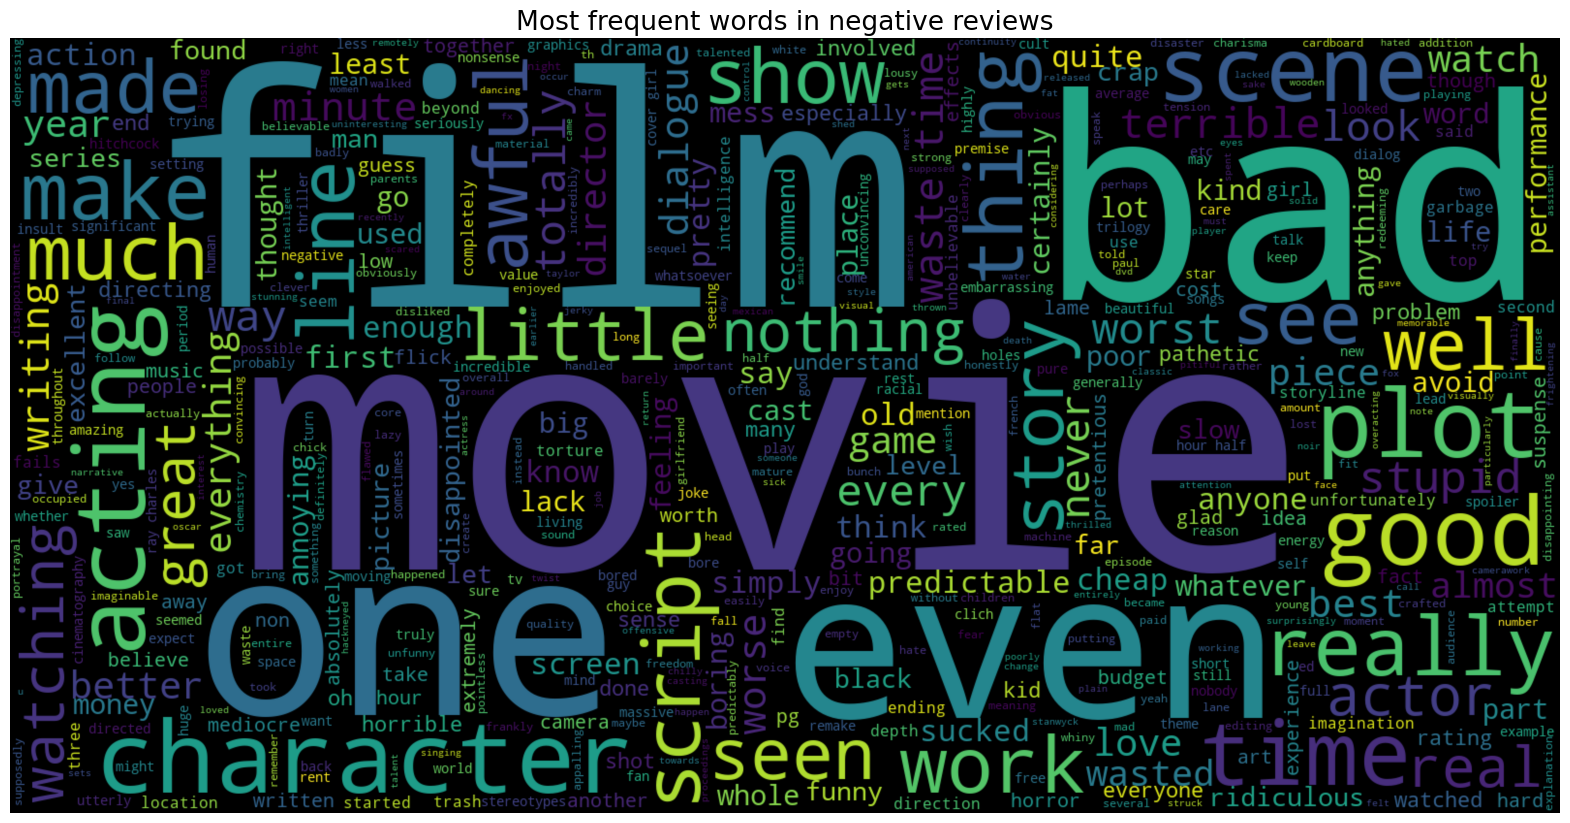

In [37]:
text = ' '.join([word for word in neg_reviews['Feedback']])
plt.figure(figsize=(20,15))
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='quadric')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [38]:
count = Counter()
for text in neg_reviews['Feedback'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 95),
 ('film', 72),
 ('bad', 64),
 ('one', 44),
 ('even', 33),
 ('time', 26),
 ('like', 25),
 ('acting', 24),
 ('plot', 22),
 ('good', 22),
 ('would', 20),
 ('really', 18),
 ('characters', 17),
 ('make', 16),
 ('ever', 16)]

In [39]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words

,word,count
0,movie,95
1,film,72
2,bad,64
3,one,44
4,even,33
5,time,26
6,like,25
7,acting,24
8,plot,22
9,good,22


In [40]:
X = imdb_dataset['Feedback']
Y = imdb_dataset['Target']

# Task-5. Processing Tokens using Term Frequency - Inverse Documnet Frequency (TF-IDF)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vect = TfidfVectorizer()
X = vect.fit_transform(imdb_dataset['Feedback'])

In [43]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
vect.get_feature_names()

['aailiyah',
 'abandoned',
 'ability',
 'abroad',
 'absolutely',
 'abstruse',
 'abysmal',
 'academy',
 'accents',
 'accessible',
 'acclaimed',
 'accolades',
 'accurate',
 'accurately',
 'accused',
 'achievement',
 'achille',
 'ackerman',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actually',
 'adams',
 'adaptation',
 'add',
 'added',
 'addition',
 'admins',
 'admiration',
 'admitted',
 'adorable',
 'adrift',
 'adventure',
 'advise',
 'aerial',
 'aesthetically',
 'affected',
 'affleck',
 'afraid',
 'africa',
 'afternoon',
 'age',
 'aged',
 'ages',
 'ago',
 'agree',
 'agreed',
 'aimless',
 'air',
 'aired',
 'akasha',
 'akin',
 'alert',
 'alexander',
 'alike',
 'allison',
 'allow',
 'allowing',
 'almost',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'amateurish',
 'amaze',
 'amazed',
 'amazing',
 'amazingly',
 'america',
 'american',
 'americans',
 'among',
 'amount',
 'amusing',
 'anatomist',
 'angel',
 'an

# Task-6. Model Building

## Splitting the Dataset for train and test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
x_train.shape

(596, 2883)

In [48]:
x_test.shape

(149, 2883)

In [49]:
y_train.shape

(596,)

In [50]:
y_test.shape

(149,)

## Using Logistic Regression Algorithm

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay

In [53]:
log_reg=LogisticRegression(max_iter=1000)

In [54]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [55]:
log_pred=log_reg.predict(x_test)

In [56]:
log_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [57]:
log_acc = accuracy_score(log_pred, y_test)
print("Test accuracy: {:.2f}%".format(log_acc*100))

Test accuracy: 77.18%


In [58]:
print(confusion_matrix(y_test, log_pred))

[[48 25]
 [ 9 67]]


## Confusion Matrix for Logistic Regression Algorithm

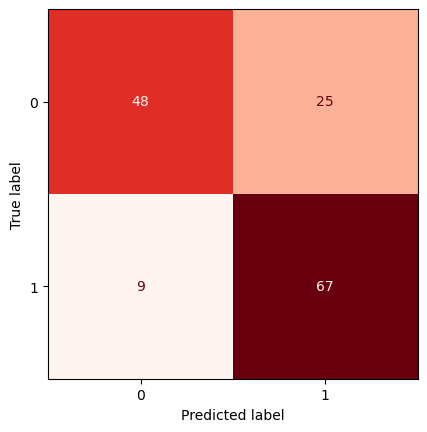

In [59]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=log_pred,cmap='Reds',colorbar=False)

In [60]:
print(classification_report(y_true=y_test,y_pred=log_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74        73
           1       0.73      0.88      0.80        76

    accuracy                           0.77       149
   macro avg       0.79      0.77      0.77       149
weighted avg       0.78      0.77      0.77       149



## Using Decision Tree Algorithm

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt=DecisionTreeClassifier()

In [63]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
pred_dt=dt.predict(x_test)
pred_dt

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [65]:
dec_acc = accuracy_score(pred_dt, y_test)
print("Test accuracy: {:.2f}%".format(dec_acc*100))

Test accuracy: 63.76%


In [66]:
print(confusion_matrix(y_test, pred_dt))

[[39 34]
 [20 56]]


## Confusion Matrix for Decision Tree Algorithm

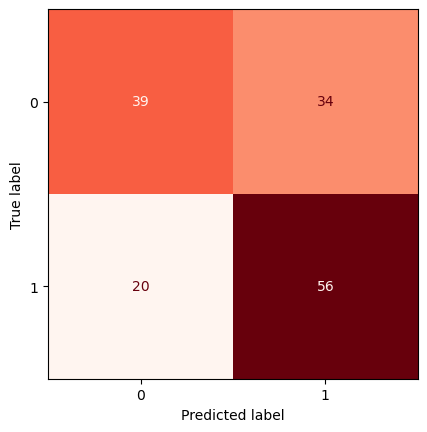

In [67]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=pred_dt,cmap='Reds',colorbar=False)

In [68]:
print(classification_report(y_true=y_test,y_pred=pred_dt))

              precision    recall  f1-score   support

           0       0.66      0.53      0.59        73
           1       0.62      0.74      0.67        76

    accuracy                           0.64       149
   macro avg       0.64      0.64      0.63       149
weighted avg       0.64      0.64      0.63       149



## Using Random Forest Algorithm

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier(max_features=3,oob_score=True)

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=3, oob_score=True)

In [72]:
pred_rf=rf.predict(x_test)
pred_rf

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [73]:
rand_acc = accuracy_score(pred_rf, y_test)
print("Test accuracy: {:.2f}%".format(rand_acc*100))

Test accuracy: 73.15%


In [74]:
print(confusion_matrix(y_test, pred_rf))

[[38 35]
 [ 5 71]]


## Confusion Matrix for Random Forest Algorithm 

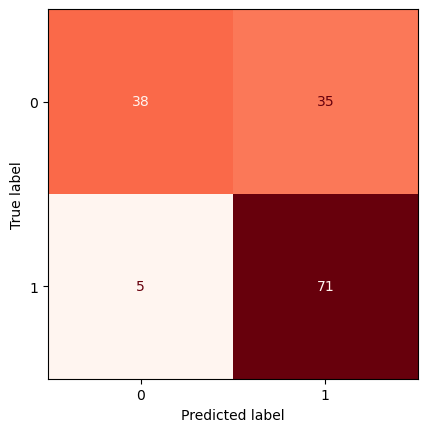

In [75]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=pred_rf,cmap='Reds',colorbar=False)

In [76]:
print(classification_report(y_true=y_test,y_pred=pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.52      0.66        73
           1       0.67      0.93      0.78        76

    accuracy                           0.73       149
   macro avg       0.78      0.73      0.72       149
weighted avg       0.77      0.73      0.72       149



## Using K-Nearest Neighbors Algorithm

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn=KNeighborsClassifier(n_neighbors=2)

In [79]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [80]:
pred_knn=knn.predict(x_test)
pred_knn

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [81]:
knn_acc = accuracy_score(pred_knn, y_test)
print("Test accuracy: {:.2f}%".format(knn_acc*100))

Test accuracy: 75.17%


In [82]:
print(confusion_matrix(y_test, pred_knn))

[[59 14]
 [23 53]]


## Confusion Matrix for K-Nearest Neighbor Algorithm

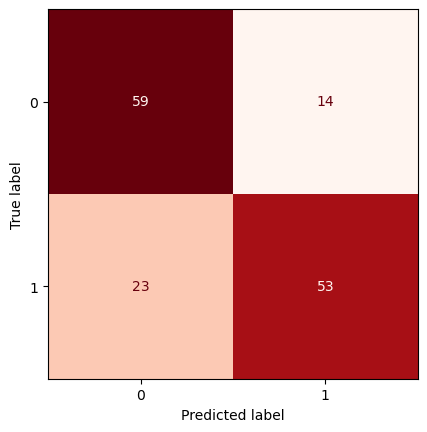

In [83]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=pred_knn,cmap='Reds',colorbar=False)

In [84]:
print(classification_report(y_true=y_test,y_pred=pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        73
           1       0.79      0.70      0.74        76

    accuracy                           0.75       149
   macro avg       0.76      0.75      0.75       149
weighted avg       0.76      0.75      0.75       149



## Using Naive Bayes Algorithm

In [85]:
from sklearn.naive_bayes import MultinomialNB

In [86]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)

In [87]:
mnb_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [88]:
naive_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(naive_acc*100))

Test accuracy: 77.18%


In [89]:
print(confusion_matrix(y_test, mnb_pred))

[[54 19]
 [15 61]]


## Confusion Matrix for Naive Bayes Algorithm 

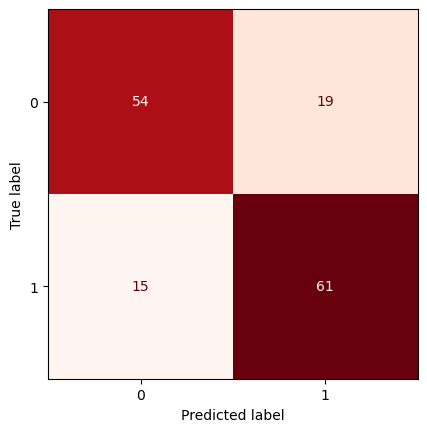

In [90]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=mnb_pred,cmap='Reds',colorbar=False)

In [91]:
print(classification_report(y_true=y_test,y_pred=mnb_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        73
           1       0.76      0.80      0.78        76

    accuracy                           0.77       149
   macro avg       0.77      0.77      0.77       149
weighted avg       0.77      0.77      0.77       149



## Using Support Vector Machine Algorithm

In [92]:
from sklearn.svm import SVC

In [93]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

In [94]:
svc_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [95]:
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 78.52%


In [96]:
print(confusion_matrix(y_test, svc_pred))

[[46 27]
 [ 5 71]]


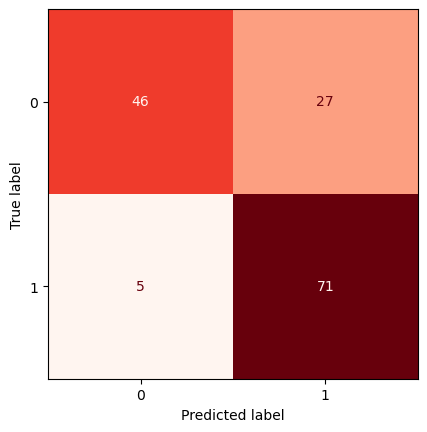

In [97]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=svc_pred,cmap='Reds',colorbar=False)

In [98]:
print(classification_report(y_true=y_test,y_pred=svc_pred))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74        73
           1       0.72      0.93      0.82        76

    accuracy                           0.79       149
   macro avg       0.81      0.78      0.78       149
weighted avg       0.81      0.79      0.78       149



# Task-7. Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C':[0.1,1, 10, 100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.513 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [100]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [101]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.77
best parameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [102]:
svc =SVC(C = 10, gamma=1,kernel='rbf')
svc.fit(x_train, y_train)
svcg_pred = svc.predict(x_test)
svcg_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [103]:
svcg_acc = accuracy_score(svcg_pred, y_test)
print("Test accuracy: {:.2f}%".format(svcg_acc*100))

Test accuracy: 79.19%


In [104]:
print(confusion_matrix(y_test, svcg_pred))

[[53 20]
 [11 65]]


## Confusion Matrix for Support Vector Machine Algorithm

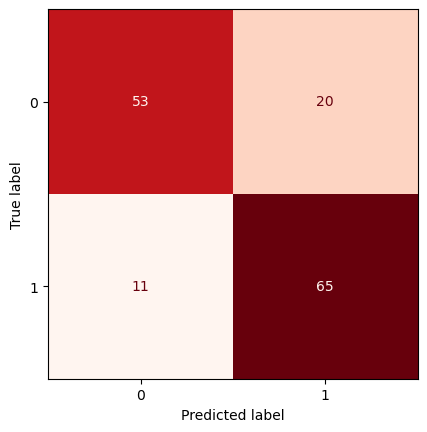

In [105]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=svcg_pred,cmap='Reds',colorbar=False)

In [106]:
print(classification_report(y_true=y_test,y_pred=svcg_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        73
           1       0.76      0.86      0.81        76

    accuracy                           0.79       149
   macro avg       0.80      0.79      0.79       149
weighted avg       0.80      0.79      0.79       149



# Task-8. Model Evaluation

## Accuracies of Different Models

In [107]:
print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(log_acc*100))
print("Test Accuracy of Decision Tree Algorithm: {:.2f}%".format(dec_acc*100))
print("Test Accuracy of Random Forest Algorithm: {:.2f}%".format(rand_acc*100))
print("Test Accuracy of K-Nearest Neighbors Algorithm: {:.2f}%".format(knn_acc*100))
print("Test Accuracy of Naive Bayes Algorithm: {:.2f}%".format(naive_acc*100))
print("Test Accuracy of Support Vector Machine Algorithm: {:.2f}%".format(svcg_acc*100))

Test Accuracy of Logistic Regression Algorithm: 77.18%
Test Accuracy of Decision Tree Algorithm: 63.76%
Test Accuracy of Random Forest Algorithm: 73.15%
Test Accuracy of K-Nearest Neighbors Algorithm: 75.17%
Test Accuracy of Naive Bayes Algorithm: 77.18%
Test Accuracy of Support Vector Machine Algorithm: 79.19%


In [108]:
print('Classification Report for Logistic Regression Algorithm')
print(classification_report(y_true=y_test,y_pred=log_pred))
print('---------------------------------------------------------')
print('Classification Report for Decision Tree Algorithm')
print(classification_report(y_true=y_test,y_pred=pred_dt))
print('---------------------------------------------------------')
print('Classification Report for Random Forest Algorithm')
print(classification_report(y_true=y_test,y_pred=pred_rf))
print('---------------------------------------------------------')
print('Classification Report for K-Nearest Neighbors Algorithm')
print(classification_report(y_true=y_test,y_pred=pred_knn))
print('---------------------------------------------------------')
print('Classification Report for Naive Bayes Algorithm')
print(classification_report(y_true=y_test,y_pred=mnb_pred))
print('---------------------------------------------------------')
print('Classification Report for Support Vector Machine Algorithm')
print(classification_report(y_true=y_test,y_pred=svcg_pred))

Classification Report for Logistic Regression Algorithm
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        73
           1       0.73      0.88      0.80        76

    accuracy                           0.77       149
   macro avg       0.79      0.77      0.77       149
weighted avg       0.78      0.77      0.77       149

---------------------------------------------------------
Classification Report for Decision Tree Algorithm
              precision    recall  f1-score   support

           0       0.66      0.53      0.59        73
           1       0.62      0.74      0.67        76

    accuracy                           0.64       149
   macro avg       0.64      0.64      0.63       149
weighted avg       0.64      0.64      0.63       149

---------------------------------------------------------
Classification Report for Random Forest Algorithm
              precision    recall  f1-score   support

           0       

# Conclusion

## For this assessment I used different algorithms and compared the models, finally got Accuracy of 79.19%, F1-score of 0.81 for 1(positive) and 0.77 for 0(negative), Precision of 0.76 for 1(positive) and 0.83 for 0(negative) and Recall of 0.86 for 1(positive) and 0.73 for 0(negative) by Support Vector Machine after doing Hyper Parameter Tuning.